In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as mst
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
mst.use('ggplot')
sns.set_style('whitegrid')

## Немного терминов

* __`"Soft labels"/"Soft prediction"`__ = Собственно, __вероятность__ принадлежности объекта классу, которую вам возвращает классификатор.
* __`"Hard labels"/"Hard prediction"`__: Если классификация на несколько классов: $argmax_if_i(x)$, то есть просто выбираем класс с наибольшей вероятностью. Если бинарная классификация, то можно все сделать интереснее и расмотреть задачу, как $[ f_i(x) > b ]$, где $b$ - порог.

# Метрики классификации

## Accuracy

$$ \large Accuracy = \frac{1}{N}\sum_{i=1}^N [y_i = \hat{y}_i] $$

Показывает, как часто мы предсказываем правильно. Оптимальная константа $\alpha$ равна, очевидно, моде целевой переменной.

Несмотря на простоту, ее тяжело оптимизировать.

## LogLoss

__Бинарная классификация:__

$$ \large LogLoss = -\frac{1}{N}\sum_{i=1}^N y_i log(\hat{y}_i) + (1 - y_i)\:log(1-\hat{y}_i) $$

__Несколько классов:__

$$ \large LogLoss = -\frac{1}{N}\sum_{i=1}^N\sum_{l=1}^L y_{il}\:log(\hat{y}_{il}) $$

_На практике:_

$$ \large LogLoss = -\frac{1}{N}\sum_{i=1}^N\sum_{l=1}^L y_{il}\:log( min( max(\hat{y}_{il}, 10^{-15}), 1 - 10^{-15} )) $$

In [2]:
from sklearn.metrics import log_loss

In [42]:
x_range = np.linspace(0.0, 1.0, 101)
error_log_loss = [log_loss([0], [[1-x, x]], labels=[0, 1]) for x in x_range]
abs_error      = [x - 0.0 for x in x_range]

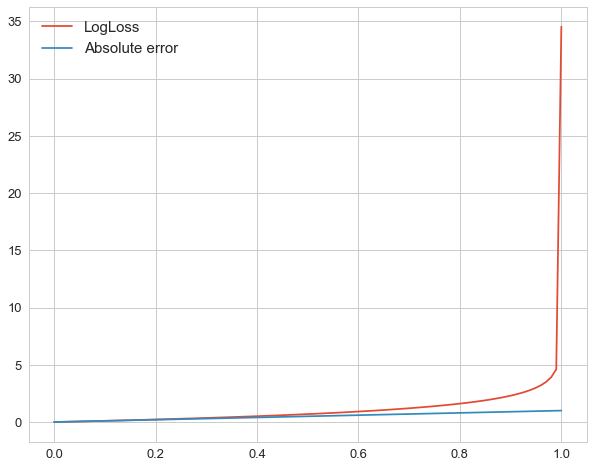

In [43]:
plt.plot(x_range, error_log_loss, label='LogLoss');
plt.plot(x_range, abs_error, label='Absolute error');
plt.legend();

Лучшая константа $\alpha$ - вектор, равный соответствующим вероятностям появления объекта в выборке:

> 10 cats

> 90 dogs

Тогда $\alpha = [0.1, 0.9]$

## Отступление

|              | $y=1$                   | $y=0$                   |
|:------------:|:-----------------------:|:-----------------------:|
| $\hat{y}=1$  | True Positive (__TP__)  | False Positive (__FP__) |
| $\hat{y}=0$  | False Negative (__FN__) | True Negative (__TN__)  |

$$ \large precision = \frac{TP}{TP + FP} $$

$$ \large recall = \frac{TP}{TP + FN} $$

In [97]:
from IPython.display import Image

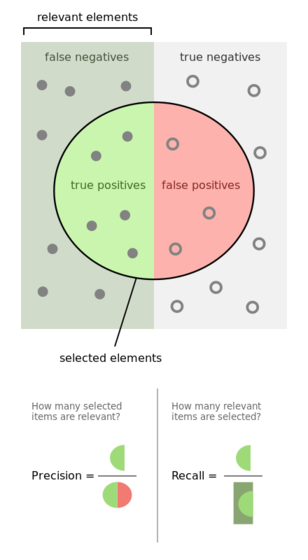

In [98]:
Image('images/prf.png')

$$ \large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall} $$

https://habrahabr.ru/company/ods/blog/328372/

## AUC-ROC

In [45]:
points = np.array([0.1, 0.15, 0.4, 0.65, 0.75, 0.85, 0.90])
p_colors =       [ 'r', 'r',  'r', 'r',  'g',  'g',  'g']

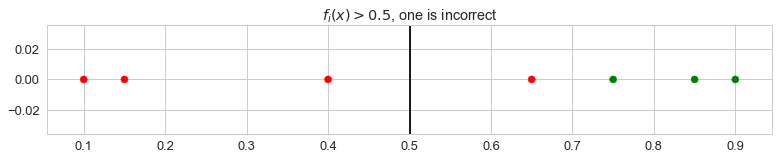

In [56]:
plt.figure(figsize=(13, 2));
plt.scatter(points, np.zeros_like(points), color=p_colors);
plt.axvline(x=0.5, c='k');
plt.title('$f_i(x) > 0.5$, one is incorrect');

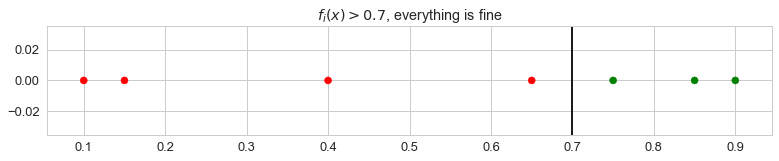

In [57]:
plt.figure(figsize=(13, 2));
plt.scatter(points, np.zeros_like(points), color=p_colors);
plt.axvline(x=0.7, c='k');
plt.title('$f_i(x) > 0.7$, everything is fine');

In [91]:
point_scores = np.array([0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.90])
points       = np.array([0,   1,   0,   0,   1,   1,   1])
p_colors     = ['r' if x == 0 else 'g' for x in points]

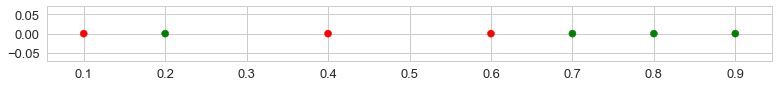

In [92]:
plt.figure(figsize=(13, 1));
plt.scatter(point_scores, np.zeros_like(point_scores), color=p_colors);

*** drawing time! ***